In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

from tqdm import tqdm

In [2]:
ds_cfd = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_cfd.nc")
ds_fd = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_fd.nc")
ds_csu = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_csu.nc")
ds_id = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_id.nc")
ds_su = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-eca_su.nc")

ds_cdd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cdd.nc")
ds_cwd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_cwd.nc")
ds_pd = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_pd.nc")
ds_rr1 = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rr1.nc")
ds_rx1day = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx1day.nc")
ds_rx5day = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_rx5day.nc")
ds_sdii = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-eca_sdii.nc")

In [3]:
lons, lats = np.meshgrid(ds_cdd.lon, ds_cdd.lat)

In [4]:
psr = xr.open_dataset("../../data/finland/mescan_surfex_pine_spruce_ratio_finland.nc")

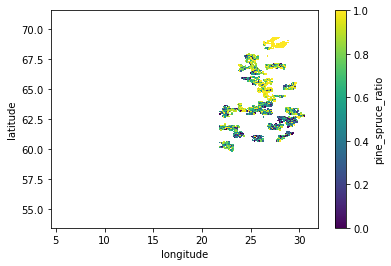

In [5]:
psr.pine_spruce_ratio.plot()

In [6]:
data = {
    "ratio": psr.pine_spruce_ratio.values.ravel()
}

In [7]:
data["cfd"] = ds_cfd.number_of_cfd_periods_with_more_than_5days_per_time_period.values.ravel()
data["fd"] = ds_fd.frost_days_index_per_time_period.values.ravel()
data["csu"] = ds_csu.number_of_csu_periods_with_more_than_5days_per_time_period.values.ravel()
data["id"] = ds_id.ice_days_index_per_time_period.values.ravel()
data["su"] = ds_su.summer_days_index_per_time_period.values.ravel()

In [8]:
data["cdd"] = ds_cdd.number_of_cdd_periods_with_more_than_5days_per_time_period.values.ravel()
data["cwd"] = ds_cwd.number_of_cwd_periods_with_more_than_5days_per_time_period.values.ravel()
data["pd"] = ds_pd.precipitation_days_index_per_time_period.values.ravel()
data["rr1"] = ds_rr1.wet_days_index_per_time_period.values.ravel()
data["rx1day"] = ds_rx1day.highest_one_day_precipitation_amount_per_time_period.values.ravel()
data["rx5day"] = ds_rx5day.highest_five_day_precipitation_amount_per_time_period.values.ravel()
data["sdii"] = ds_sdii.simple_daily_intensity_index_per_time_period.values.ravel()

In [9]:
df = pd.DataFrame(data)
df.head()

,ratio,cfd,fd,csu,id,su,cdd,cwd,pd,rr1,rx1day,rx5day,sdii
0,NaN,3.0,72.0,0.0,21.0,0.0,171.0,56.0,2147.0,2147.0,46.463284,46.463284,5.506374
1,NaN,3.0,80.0,0.0,23.0,0.0,172.0,53.0,2137.0,2137.0,45.531666,45.531666,5.599585
2,NaN,3.0,90.0,0.0,28.0,0.0,171.0,51.0,2131.0,2131.0,51.473633,51.473633,5.635111
3,NaN,3.0,96.0,0.0,31.0,0.0,172.0,55.0,2142.0,2142.0,57.756439,57.756439,5.662997
4,NaN,3.0,100.0,0.0,34.0,0.0,169.0,57.0,2161.0,2161.0,63.826298,63.826298,5.695758


In [10]:
df1 = df.dropna(inplace=False)
df1 = df[df["ratio"] > 0]
df1.columns[1:]

Index(['cfd', 'fd', 'csu', 'id', 'su', 'cdd', 'cwd', 'pd', 'rr1', 'rx1day',
       'rx5day', 'sdii'],
      dtype='object')

In [20]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df1[df1.columns[1:]], df1["ratio"])

In [22]:
X_train

,cfd,fd,csu,id,su,cdd,cwd,pd,rr1,rx1day,rx5day,sdii
31530,69.0,1592.0,15.0,949.0,273.0,190.0,36.0,1943.0,1943.0,53.377171,53.377171,4.684346
63123,80.0,2142.0,1.0,1430.0,132.0,205.0,36.0,1917.0,1917.0,42.938824,42.938824,5.005725
58863,67.0,2076.0,3.0,1446.0,143.0,204.0,28.0,1849.0,1849.0,37.899582,37.899582,4.761030
42734,62.0,1543.0,0.0,1033.0,24.0,198.0,37.0,1924.0,1924.0,46.783752,46.783752,4.895717
29895,71.0,1651.0,16.0,986.0,322.0,187.0,27.0,1858.0,1858.0,87.118828,87.118828,5.270391
70032,81.0,2483.0,1.0,1663.0,94.0,186.0,48.0,2080.0,2080.0,65.337883,65.337883,4.695091
57466,80.0,2189.0,4.0,1238.0,147.0,215.0,25.0,1800.0,1800.0,44.043983,44.043983,5.056419
44342,60.0,1371.0,0.0,821.0,0.0,222.0,20.0,1670.0,1670.0,40.279060,40.279060,5.102818
50608,78.0,2028.0,9.0,1186.0,231.0,176.0,36.0,1956.0,1956.0,43.448898,43.448898,5.328654
55521,79.0,2000.0,7.0,1208.0,184.0,209.0,23.0,1758.0,1758.0,65.989304,65.989304,5.142906


In [23]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
mean_squared_error(y_test, y_pred)

0.055364840531802614

In [26]:
r2_score(y_test, y_pred)

0.326687524225057

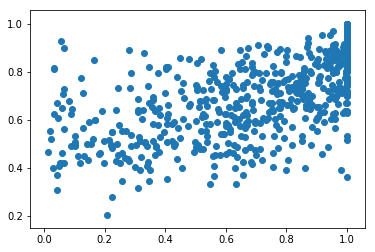

In [27]:
plt.scatter(y_test, y_pred)

In [28]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [29]:
df_results

,observed,predicted
30204,0.585923,0.713719
20990,0.854358,0.686397
54199,0.610170,0.769151
19363,1.000000,0.934643
60505,0.804611,0.433503
40718,0.749233,0.756230
32190,0.328175,0.877258
55534,0.752288,0.644254
30543,0.237504,0.642287
69324,0.056995,0.461018


In [30]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [31]:
feature_importances

,importance
id,0.205756
fd,0.152082
sdii,0.113462
su,0.078970
cdd,0.078454
cwd,0.069162
cfd,0.061970
rx5day,0.060858
rx1day,0.060688
rr1,0.043434


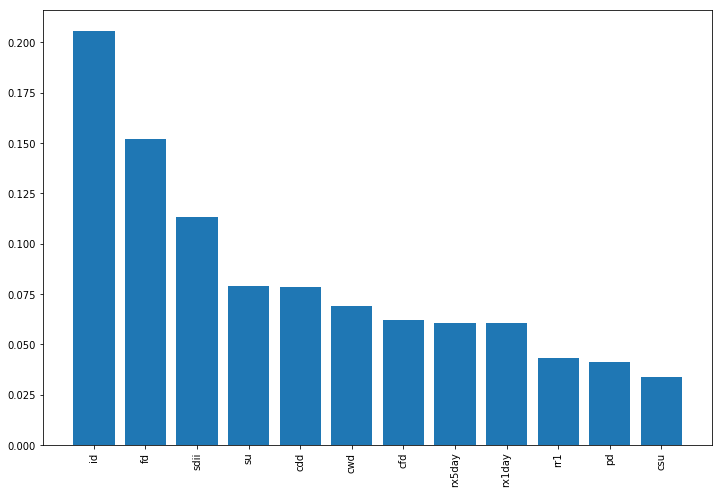

In [32]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()